# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Utility Functions

## Metrics

In [57]:
def get_mse(y_real, y_pred):
    return np.mean((y_real - y_pred) ** 2)

def get_rmse(y_real, y_pred):
    return np.sqrt(get_mse(y_real, y_pred))

## Standardization

In [58]:
class StandardScaler:
    def __init__(self):
        self.fitted = False

    def fit_transform(self, data):      
        self.mean = data.mean(axis=0)
        self.std = data.std(axis=0)
        self.fitted = True

        scaled_data = (data - self.mean) / self.std
        return scaled_data
    
    def transform(self, data):
        if not self.fitted:
            raise Exception('Scaler not fitted!')

        scaled_data = (data - self.mean) / self.std
        return scaled_data

    def inverse_transform(self, scaled_data):
        if not self.fitted:
            raise Exception('Scaler not fitted!')
        
        original_data = (scaled_data * self.std) + self.mean
        return original_data


## Min-max feature scaling

In [72]:
class MinMaxScaler:
    def __init__(self):
        self.fitted = False

    def fit_transform(self, data):      
        self.maximum = data.max(axis=0)
        self.minimum = data.min(axis=0)
        self.fitted = True

        scaled_data =  (data - self.minimum) / (self.maximum - self.minimum)
        return scaled_data
    
    def transform(self, data):
        if not self.fitted:
            raise Exception('Scaler not fitted!')

        scaled_data =  (data - self.minimum) / (self.maximum - self.minimum)
        return scaled_data

    def inverse_transform(self, scaled_data):
        if not self.fitted:
            raise Exception('Scaler not fitted!')
        
        original_data = (self.maximum - self.minimum) * scaled_data + self.minimum
        return original_data


scaler = MinMaxScaler()
scaler.fit_transform(X_train)

array([[3.16243914e-01, 4.80000000e-01, 1.04662269e-01, ...,
        1.60961148e-03, 1.78533475e-01, 5.57731959e-01],
       [5.01737907e-01, 4.20000000e-01, 1.21876688e-01, ...,
        1.69910844e-03, 1.34962806e-01, 6.69072165e-01],
       [5.22447966e-01, 1.00000000e+00, 9.68743341e-02, ...,
        9.19105519e-04, 5.57917109e-01, 1.88659794e-01],
       ...,
       [2.06286810e-01, 8.00000000e-02, 1.21062310e-01, ...,
        1.21766216e-03, 2.69925611e-01, 5.83505155e-01],
       [5.96833147e-01, 7.00000000e-01, 1.26865689e-01, ...,
        1.45903564e-03, 1.50903294e-01, 6.46391753e-01],
       [1.49432422e-01, 6.80000000e-01, 7.59018030e-02, ...,
        1.92585165e-03, 6.25929862e-01, 1.56701031e-01]])

# Question 1

In [74]:
data = np.genfromtxt('./artificial1d.csv', delimiter=',')
data[:5,:]

array([[-1.        , -2.08201726],
       [-0.93103448, -1.32698023],
       [-0.86206897, -1.10559772],
       [-0.79310345, -0.87394576],
       [-0.72413793, -0.28502695]])

## Item a) 
Show the model parameters and the MSE (Mean Squared Error) obtained by OLS (Ordinary Least Squares) method. Plot the result line over the data.

In [136]:
def linear_regression_ols(X, y):
    w_hat = (np.linalg.pinv(X.T @ X) @ X.T) @ y
    return w_hat.ravel()

In [137]:
X = np.hstack([np.ones((len(data), 1)), data[:,[0]]])
y = data[:,[1]]

In [138]:
w = linear_regression_ols(X, y)

print('Coeficients of Linear Regression Using Ordinary Least Squares Method:')
for i in range(len(w)):
    if i == 0:
        print('Intercept:\t{:.6f}'.format(w[i]))
    else:
        print('X({}):    \t{:.6f}'.format(i, w[i]))

y_pred = (X @ w).reshape(-1, 1)

print('\n#--- Metrics ---#')
print('MSE:', get_mse(y, y_pred))
print('RMSE:', get_rmse(y, y_pred))


Coeficients of Linear Regression Using Ordinary Least Squares Method:
Intercept:	0.067618
X(1):    	1.574865

#--- Metrics ---#
MSE: 0.21340090132936987
RMSE: 0.46195335406225796


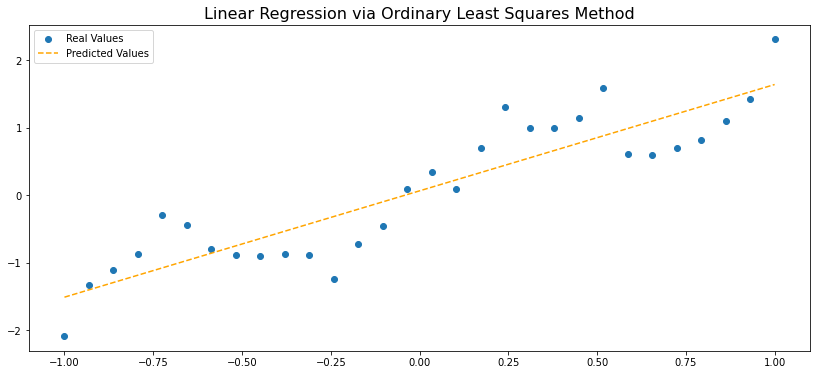

In [139]:
fig = plt.figure(figsize=(14, 6))
plt.title('Linear Regression via Ordinary Least Squares Method', fontsize=16)
plt.scatter(X[:, 1], y, label = 'Real Values')
plt.plot(X[:, 1], y_pred, c='orange', linestyle='--', label = 'Predicted Values')
plt.legend()
plt.show()

## Item b) 
Show the model parameters, the MSE and the learning curve obtained by Gradient Descent method. Plot the result line over the data.

In [140]:
def linear_regression_gd(X, y, alfa=0.1, n_iterations=1000):

    np.random.seed(123142)
    w = np.random.uniform(0, 10, X.shape[1])

    count = 0
    learning_curve = []
    while count < n_iterations:
        e = (y.ravel() - X @ w) 
        w = w + (1/len(y)) * alfa * (e @ X) 

        y_pred = (X @ w)
        learning_curve.append(get_mse(y, y_pred))

        count+=1

    # print(w * X_std + X_mean)
    return np.array(w), learning_curve

In [141]:
X = np.hstack([np.ones((data.shape[0], 1)), data[:, [0]]])
y = data[:, [1]]

In [142]:
w, learning_curve_gd = linear_regression_gd(X, y, alfa=0.1, n_iterations=200)

print('Coeficients of Linear Regression Using Gradient Descent Method:')
for i in range(len(w)):
    if i == 0:
        print('Intercept:\t{:.6f}'.format(w[i]))
    else:
        print('X({}):    \t{:.6f}'.format(i, w[i]))

y_pred = (X @ w).reshape(-1, 1)

print('\n#--- Metrics ---#')
print('MSE:', get_mse(y, y_pred))
print('RMSE:', get_rmse(y, y_pred))

Coeficients of Linear Regression Using Gradient Descent Method:
Intercept:	0.067618
X(1):    	1.576966

#--- Metrics ---#
MSE: 0.21340247414512706
RMSE: 0.4619550564125552


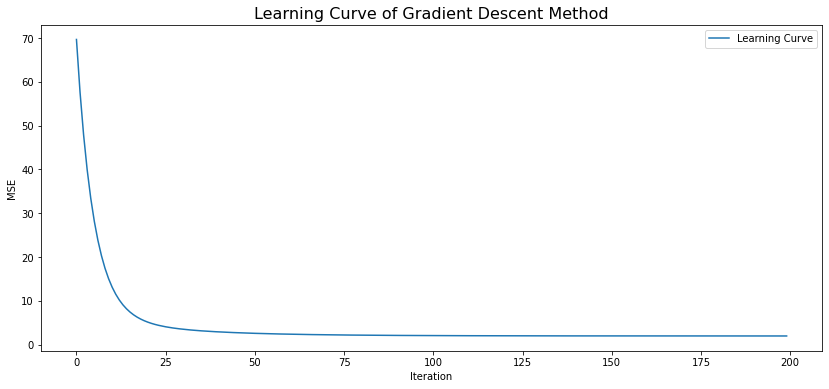

In [143]:
fig = plt.figure(figsize=(14, 6))
plt.title('Learning Curve of Gradient Descent Method', fontsize=16)
# plt.scatter(X[:, 1], y, label = 'Real Values')
plt.plot(learning_curve_gd, label='Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('MSE')
# plt.plot(X[:, 1], y_pred, c='orange', linestyle='--', label = 'Predicted Values')
plt.legend()
plt.show()

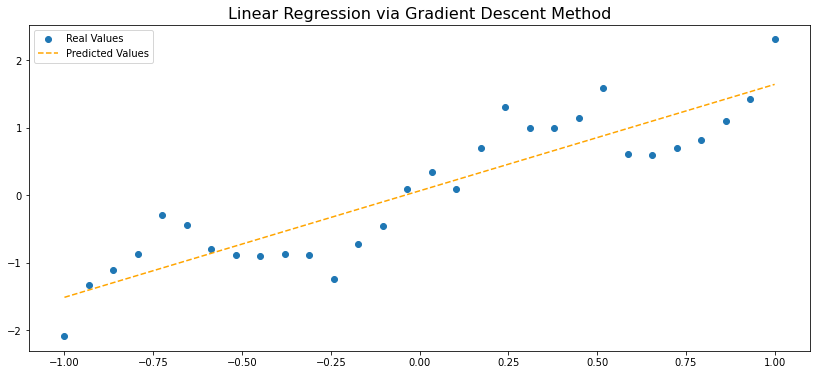

In [144]:
fig = plt.figure(figsize=(14, 6))
plt.title('Linear Regression via Gradient Descent Method', fontsize=16)
plt.scatter(X[:, 1], y, label = 'Real Values')
plt.plot(X[:, 1], y_pred, c='orange', linestyle='--', label = 'Predicted Values')
plt.legend()
plt.show()

## Item c) 
Show the model parameters, the MSE and the learning curve obtained by Stochastic Gradient Descent method. Plot the result line over the data.

In [145]:
def linear_regression_sgd(X, y, alfa=0.1, n_iterations=1000):

    np.random.seed(123142)
    w = np.random.uniform(0, 10, X.shape[1])
    random_indexes = np.random.randint(0, X.shape[0], n_iterations)

    count = 0
    learning_curve = []
    while count < n_iterations:
        
        random_X = X[[random_indexes[count]]]
        random_y = y[[random_indexes[count]]]

        e = (random_y.ravel() - random_X @ w).reshape(-1, 1)
        w = (w + alfa * (e * random_X)).ravel()

        y_pred = (w @ X.T)
        learning_curve.append(get_mse(y, y_pred))

        count+=1

    return np.array(w), learning_curve

In [146]:
X = np.hstack([np.ones((data.shape[0], 1)), data[:, [0]]])
y = data[:, [1]]

In [147]:
w, learning_curve_sgd = linear_regression_sgd(X, y, alfa=0.1, n_iterations=200)

print('Coeficients of Linear Regression Using Stochastic Gradient Descent Method:')
for i in range(len(w)):
    if i == 0:
        print('Intercept:\t{:.6f}'.format(w[i]))
    else:
        print('X({}):    \t{:.6f}'.format(i, w[i]))

y_pred = (X @ w).reshape(-1, 1)

print('\n#--- Metrics ---#')
print('MSE:', get_mse(y, y_pred))
print('RMSE:', get_rmse(y, y_pred))

Coeficients of Linear Regression Using Stochastic Gradient Descent Method:
Intercept:	0.040270
X(1):    	1.624766

#--- Metrics ---#
MSE: 0.21503606463698174
RMSE: 0.46371981264226975


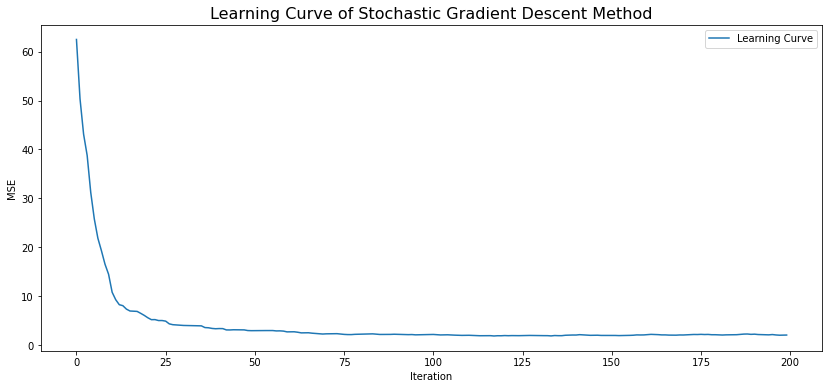

In [148]:
fig = plt.figure(figsize=(14, 6))
plt.title('Learning Curve of Stochastic Gradient Descent Method', fontsize=16)
plt.plot(learning_curve_sgd, label='Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Learning Curves Compare

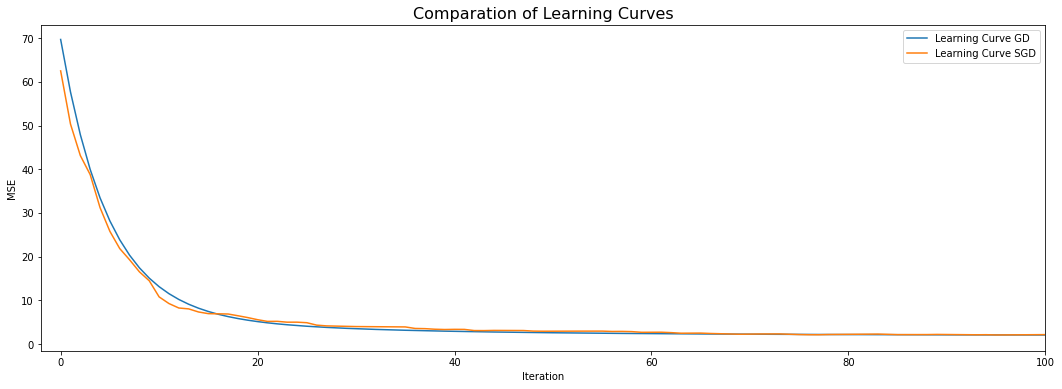

In [149]:
fig = plt.figure(figsize=(18, 6))
plt.title('Comparation of Learning Curves', fontsize=16)
plt.plot(learning_curve_gd, label='Learning Curve GD')
plt.plot(learning_curve_sgd, label='Learning Curve SGD')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.xlim(-2, 100)
plt.legend()
plt.show()

# Question 2

In [150]:
california_data = np.genfromtxt('./california.csv', delimiter=',')
california_data[:5, :]

array([[ 4.16850000e+00,  2.00000000e+01,  6.70063694e+00,
         1.17834395e+00,  7.45000000e+02,  2.37261146e+00,
         3.88000000e+01, -1.21150000e+02,  2.17500000e+00],
       [ 2.81940000e+00,  2.40000000e+01,  4.76250000e+00,
         1.02083333e+00,  6.08000000e+02,  2.53333333e+00,
         3.67500000e+01, -1.19850000e+02,  8.11000000e-01],
       [ 2.42500000e+00,  4.60000000e+01,  4.92771084e+00,
         1.01807229e+00,  7.72000000e+02,  2.32530120e+00,
         3.63300000e+01, -1.19310000e+02,  8.49000000e-01],
       [ 3.12050000e+00,  1.60000000e+01,  3.72847682e+00,
         1.10154525e+00,  1.26000000e+03,  2.78145695e+00,
         3.38700000e+01, -1.17990000e+02,  1.74000000e+00],
       [ 4.38890000e+00,  4.10000000e+01,  5.74100719e+00,
         1.19904077e+00,  8.37000000e+02,  2.00719424e+00,
         3.41500000e+01, -1.18400000e+02,  3.80400000e+00]])

In [155]:
def train_test_split(data, train_size_perc, random_seed=64852):
    N = data.shape[0]
    train_size = int(train_size_perc * N)

    indexes = np.arange(0, N, 1)

    np.random.seed(random_seed)
    train_idx = np.random.choice(indexes, train_size, replace=False)
    test_idx = np.delete(indexes, train_idx)

    train_data = data[train_idx]
    test_data = data[test_idx]

    X_train = train_data[:,:-1]
    y_train = train_data[:,[-1]]

    X_test = test_data[:,:-1]
    y_test = test_data[:,[-1]]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(california_data, 0.8)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (4000, 8)
y_train shape: (4000, 1)
X_test shape: (1000, 8)
y_test shape: (1000, 1)


In [175]:
X_scaler = MinMaxScaler()
X_train_norm = X_scaler.fit_transform(X_train)

y_scaler = MinMaxScaler()
y_train_norm = y_scaler.fit_transform(y_train)

X_test_norm = X_scaler.transform(X_test)
y_test_norm = y_scaler.transform(y_test)

In [176]:
def insert_polynomial_features(X, polynomial_degree):

    X_poly = np.hstack([np.ones((X.shape[0], 1)), X])

    if polynomial_degree > 1:
        for i in range(2, polynomial_degree+1):
            X_poly = np.hstack([X_poly, X**i])
        
    return X_poly

In [177]:

rmse_train_list = []
rmse_test_list = []

for i in range(11):
    print(f'\n\n#--- Polynomial Regression - Degree {i+1} ---#')
    X_train_norm_poly = insert_polynomial_features(X_train_norm, i+1)
    w = linear_regression_ols(X_train_norm_poly, y_train_norm).reshape(-1, 1)

    print(X_train_norm_poly.shape)
    print(w.shape)

    y_train_norm_pred = X_train_norm_poly @ w
    y_train_pred = y_scaler.inverse_transform(y_train_norm_pred)
    
    rmse_train = get_rmse(y_train, y_train_pred)
    rmse_train_list.append([i+1, rmse_train])
    print('MSE Train:', rmse_train)

    X_test_norm_poly = insert_polynomial_features(X_test_norm, i+1)
    y_test_norm_pred = X_test_norm_poly @ w
    y_test_pred = y_scaler.inverse_transform(y_test_norm_pred)

    rmse_test = get_rmse(y_test, y_test_pred)
    rmse_test_list.append([i+1, rmse_test])
    print('MSE Test:', rmse_test)

rmse_train_list = np.array(rmse_train_list)
rmse_test_list = np.array(rmse_test_list)



#--- Polynomial Regression - Degree 1 ---#
(4000, 9)
(9, 1)
MSE Train: 0.7177345670835574
MSE Test: 0.7442458183814196


#--- Polynomial Regression - Degree 2 ---#
(4000, 17)
(17, 1)
MSE Train: 0.6664305751225436
MSE Test: 0.6853826637265009


#--- Polynomial Regression - Degree 3 ---#
(4000, 25)
(25, 1)
MSE Train: 0.6385137168330282
MSE Test: 1.38385123950061


#--- Polynomial Regression - Degree 4 ---#
(4000, 33)
(33, 1)
MSE Train: 0.629679154305242
MSE Test: 1.055175477118175


#--- Polynomial Regression - Degree 5 ---#
(4000, 41)
(41, 1)
MSE Train: 0.620668188099817
MSE Test: 76.8077449078931


#--- Polynomial Regression - Degree 6 ---#
(4000, 49)
(49, 1)
MSE Train: 0.6168901026355177
MSE Test: 388.50055238149105


#--- Polynomial Regression - Degree 7 ---#
(4000, 57)
(57, 1)
MSE Train: 0.613012903279916
MSE Test: 3026.3618255648576


#--- Polynomial Regression - Degree 8 ---#
(4000, 65)
(65, 1)
MSE Train: 0.6118244952954172
MSE Test: 4101.541441962985


#--- Polynomial Regressio

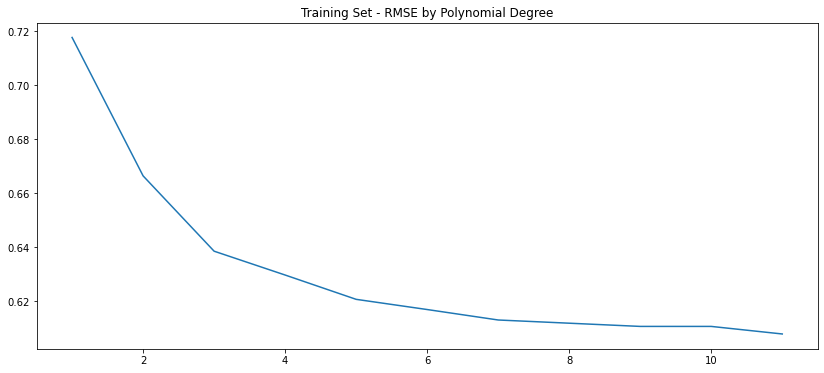

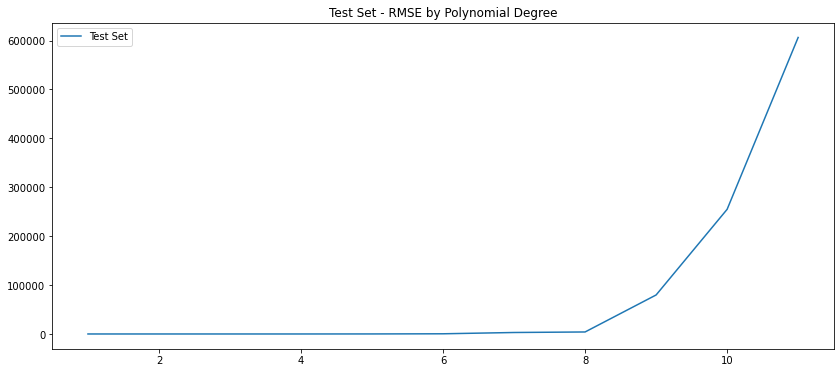

In [178]:
plt.figure(figsize=(14,6))
plt.title('Training Set - RMSE by Polynomial Degree')
plt.plot(rmse_train_list[:, 0], rmse_train_list[:, 1], label='Training Set')
# plt.ylim(0, 20)
plt.figure(figsize=(14,6))
plt.title('Test Set - RMSE by Polynomial Degree')
plt.plot(rmse_test_list[:, 0], rmse_test_list[:, 1], label='Test Set')
plt.legend()
plt.show()

## With L2 Regularization

In [179]:
def linear_regression_ols_reg(X, y, reg_lambda=0.001):
    reg_matrix = np.eye(X.shape[1], X.shape[1]) * reg_lambda
    reg_matrix[0, 0] = 0

    w_hat = (np.linalg.pinv(X.T @ X + reg_matrix) @ X.T) @ y
    return w_hat.ravel()

In [185]:
rmse_train_list = []
rmse_test_list = []

for i in range(11):
    print(f'\n\n#--- Polynomial Regression - Degree {i+1} ---#')
    X_train_norm_poly = insert_polynomial_features(X_train_norm, i+1)
    w = linear_regression_ols_reg(X_train_norm_poly, y_train_norm, 0.001).reshape(-1, 1)

    print(X_train_norm_poly.shape)
    print(w.shape)

    y_train_norm_pred = X_train_norm_poly @ w
    y_train_pred = y_scaler.inverse_transform(y_train_norm_pred)
    
    rmse_train = get_rmse(y_train, y_train_pred)
    rmse_train_list.append([i+1, rmse_train])
    print('MSE Train:', rmse_train)

    X_test_norm_poly = insert_polynomial_features(X_test_norm, i+1)
    y_test_norm_pred = X_test_norm_poly @ w
    y_test_pred = y_scaler.inverse_transform(y_test_norm_pred)

    rmse_test = get_rmse(y_test, y_test_pred)
    rmse_test_list.append([i+1, rmse_test])
    print('MSE Test:', rmse_test)

rmse_train_list = np.array(rmse_train_list)
rmse_test_list = np.array(rmse_test_list)



#--- Polynomial Regression - Degree 1 ---#
(4000, 9)
(9, 1)
MSE Train: 0.7177345678411663
MSE Test: 0.7442429928275617


#--- Polynomial Regression - Degree 2 ---#
(4000, 17)
(17, 1)
MSE Train: 0.6668865226537662
MSE Test: 0.6853119779081595


#--- Polynomial Regression - Degree 3 ---#
(4000, 25)
(25, 1)
MSE Train: 0.6507381947862494
MSE Test: 1.5564563346525415


#--- Polynomial Regression - Degree 4 ---#
(4000, 33)
(33, 1)
MSE Train: 0.643914199238103
MSE Test: 0.6771234544625773


#--- Polynomial Regression - Degree 5 ---#
(4000, 41)
(41, 1)
MSE Train: 0.636983763029028
MSE Test: 25.799402555481755


#--- Polynomial Regression - Degree 6 ---#
(4000, 49)
(49, 1)
MSE Train: 0.6360912964763936
MSE Test: 85.45784602071642


#--- Polynomial Regression - Degree 7 ---#
(4000, 57)
(57, 1)
MSE Train: 0.6357893569588688
MSE Test: 149.8412598169008


#--- Polynomial Regression - Degree 8 ---#
(4000, 65)
(65, 1)
MSE Train: 0.6348089504778045
MSE Test: 130.22257582904308


#--- Polynomial Regr

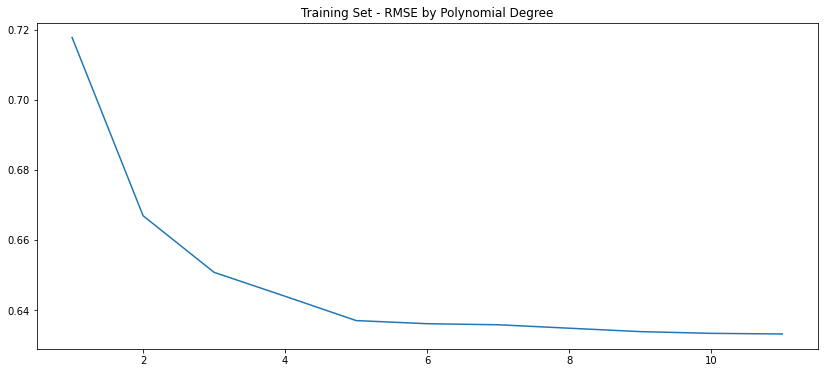

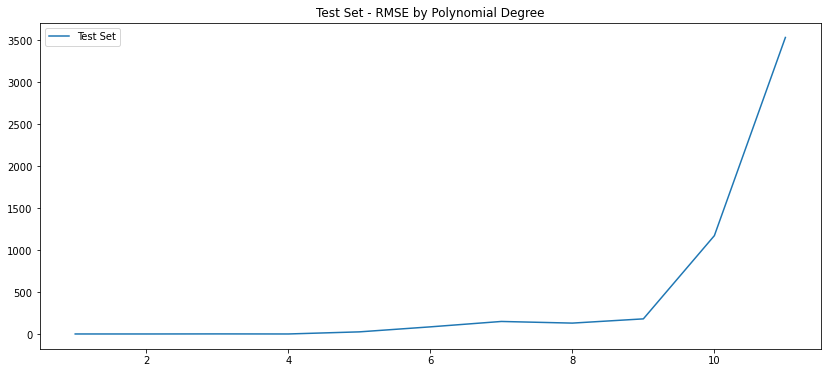

In [186]:
plt.figure(figsize=(14,6))
plt.title('Training Set - RMSE by Polynomial Degree')
plt.plot(rmse_train_list[:, 0], rmse_train_list[:, 1], label='Training Set')
# plt.ylim(0, 20)
plt.figure(figsize=(14,6))
plt.title('Test Set - RMSE by Polynomial Degree')
plt.plot(rmse_test_list[:, 0], rmse_test_list[:, 1], label='Test Set')
plt.legend()
plt.show()
# plt.ylim(0, 20)

In [70]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_norm, y_norm)
print(lr.intercept_)
print(lr.coef_)

[-3.75617269e-14]
[[ 0.73974142  0.11816427 -0.25028529  0.26680206 -0.01079144 -0.05535698
  -0.76723441 -0.7432809 ]]


In [48]:
X_t = np.array([[1,2,3]])
X_t**4

array([[ 1, 16, 81]], dtype=int32)

In [42]:
X
linear_regression_ols(X, y)

pred

array([ 5.32721923e-01,  1.65832235e-02, -2.25482040e-01,  1.09559068e+00,
        9.43125611e-07, -4.26609301e-03, -5.52791195e-02, -1.28270310e-02])